**Importing the Dependencies**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir('E:\Ai project\data\with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_101.jpg', 'with_mask_102.jpg']
['with_mask_95.jpg', 'with_mask_96.jpg', 'with_mask_97.jpg', 'with_mask_98.jpg', 'with_mask_99.jpg']


In [3]:
without_mask_files = os.listdir('E:\Ai project\data\without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_101.jpg', 'without_mask_102.jpg']
['without_mask_95.jpg', 'without_mask_96.jpg', 'without_mask_97.jpg', 'without_mask_98.jpg', 'without_mask_99.jpg']


In [4]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 889
Number of without mask images: 826


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [5]:
# create the labels

with_mask_labels = [1]*889

without_mask_labels = [0]*826

In [6]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
print(len(with_mask_labels))
print(len(without_mask_labels))

889
826


In [8]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

1715
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

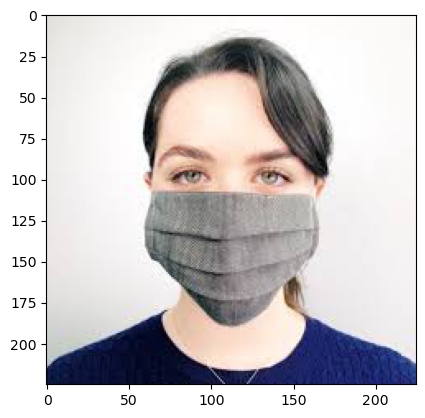

In [39]:
# displaying with mask image
img = mpimg.imread('E:\Ai project\data\with_mask\with_mask_824.jpg')
imgplot = plt.imshow(img)
plt.show()

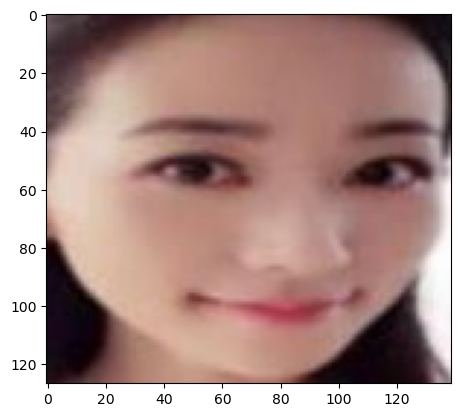

In [40]:
# displaying without mask image
img = mpimg.imread('E:\Ai project\data\without_mask/without_mask_824.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [41]:
# convert images to numpy arrays+

with_mask_path = 'E:\Ai project\data\with_mask'

data = []

for img_file in with_mask_files:

  image = Image.open(os.path.join(with_mask_path, img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'E:\Ai project\data\without_mask'


for img_file in without_mask_files:

  image = Image.open (os.path.join(without_mask_path, img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [43]:
type(data)

list

In [44]:
len(data)

1715

In [45]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [46]:
type(data[0])

numpy.ndarray

In [47]:
data[0].shape

(128, 128, 3)

In [48]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [49]:
type(X)

numpy.ndarray

In [50]:
type(Y)

numpy.ndarray

In [51]:
print(X.shape)
print(Y.shape)

(1715, 128, 128, 3)
(1715,)


In [52]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [54]:
print(X.shape, X_train.shape, X_test.shape)

(1715, 128, 128, 3) (1372, 128, 128, 3) (343, 128, 128, 3)


In [55]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [56]:
X_train[0]

array([[[ 45,  85, 107],
        [ 41,  82, 104],
        [ 37,  78, 100],
        ...,
        [ 40,  61,  93],
        [ 39,  59,  92],
        [ 39,  59,  92]],

       [[ 39,  77,  97],
        [ 41,  79, 100],
        [ 32,  73,  91],
        ...,
        [ 39,  60,  92],
        [ 38,  59,  92],
        [ 38,  59,  92]],

       [[ 39,  74,  91],
        [ 46,  81,  98],
        [ 45,  83,  97],
        ...,
        [ 35,  58,  90],
        [ 35,  58,  90],
        [ 36,  59,  91]],

       ...,

       [[226, 209, 187],
        [223, 206, 184],
        [221, 204, 182],
        ...,
        [216, 135, 152],
        [202, 133, 146],
        [187, 119, 132]],

       [[228, 210, 188],
        [225, 207, 185],
        [222, 204, 182],
        ...,
        [221, 100, 128],
        [221, 108, 134],
        [231, 120, 145]],

       [[229, 208, 187],
        [227, 207, 186],
        [222, 205, 183],
        ...,
        [228,  81, 117],
        [230,  89, 124],
        [238,  96, 132]]

In [57]:
X_train_scaled[0]

array([[[0.17647059, 0.33333333, 0.41960784],
        [0.16078431, 0.32156863, 0.40784314],
        [0.14509804, 0.30588235, 0.39215686],
        ...,
        [0.15686275, 0.23921569, 0.36470588],
        [0.15294118, 0.23137255, 0.36078431],
        [0.15294118, 0.23137255, 0.36078431]],

       [[0.15294118, 0.30196078, 0.38039216],
        [0.16078431, 0.30980392, 0.39215686],
        [0.1254902 , 0.28627451, 0.35686275],
        ...,
        [0.15294118, 0.23529412, 0.36078431],
        [0.14901961, 0.23137255, 0.36078431],
        [0.14901961, 0.23137255, 0.36078431]],

       [[0.15294118, 0.29019608, 0.35686275],
        [0.18039216, 0.31764706, 0.38431373],
        [0.17647059, 0.3254902 , 0.38039216],
        ...,
        [0.1372549 , 0.22745098, 0.35294118],
        [0.1372549 , 0.22745098, 0.35294118],
        [0.14117647, 0.23137255, 0.35686275]],

       ...,

       [[0.88627451, 0.81960784, 0.73333333],
        [0.8745098 , 0.80784314, 0.72156863],
        [0.86666667, 0

**Building a Convolutional Neural Networks (CNN)**

In [58]:
import tensorflow as tf
from tensorflow import keras

In [59]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [60]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [61]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
39/39 [==============================] - 20s 421ms/step - loss: 0.7586 - acc: 0.7002 - val_loss: 0.1621 - val_acc: 0.9493
Epoch 2/5
39/39 [==============================] - 15s 380ms/step - loss: 0.2692 - acc: 0.9028 - val_loss: 0.2801 - val_acc: 0.9130
Epoch 3/5
39/39 [==============================] - 15s 373ms/step - loss: 0.2117 - acc: 0.9238 - val_loss: 0.2568 - val_acc: 0.8696
Epoch 4/5
39/39 [==============================] - 15s 379ms/step - loss: 0.2001 - acc: 0.9263 - val_loss: 0.1104 - val_acc: 0.9565
Epoch 5/5
39/39 [==============================] - 15s 395ms/step - loss: 0.1387 - acc: 0.9514 - val_loss: 0.0879 - val_acc: 0.9710


**Model Evaluation**

In [62]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

11/11 [==============================] - 1s 68ms/step - loss: 0.0878 - acc: 0.9708
Test Accuracy = 0.9708454608917236


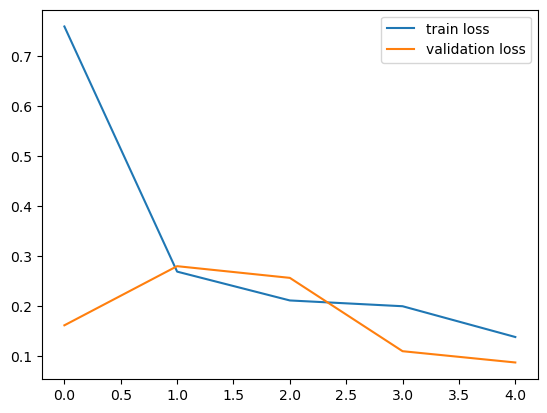

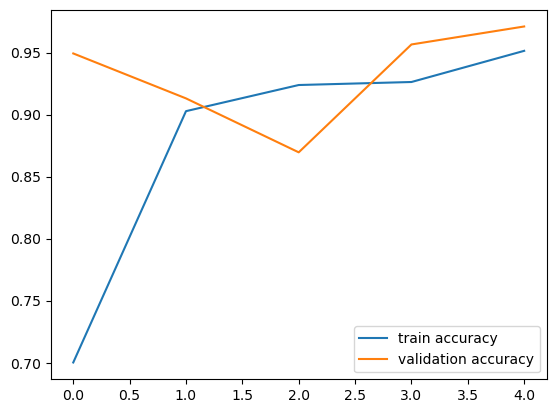

In [63]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Saving The Model**

In [65]:
#saving the model

model.save('mask_detection_model')

INFO:tensorflow:Assets written to: mask_detection_model\assets


INFO:tensorflow:Assets written to: mask_detection_model\assets
